In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
RND_STATE = 55324

### 1. Loading data

In [2]:
AH_data = pd.read_csv("data/tree_addhealth.csv")
data_clean = AH_data.dropna()
data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [3]:
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


### 2. Split into train test datasets

In [4]:
predictors = data_clean[['BIO_SEX', 'HISPANIC', 'WHITE', 'BLACK', 'NAMERICAN', 'ASIAN', 'age',
                         'ALCEVR1', 'ALCPROBS1', 'marever1', 'cocever1', 'inhever1', 'cigavail', 'DEP1', 'ESTEEM1',
                         'VIOL1',
                         'PASSIST', 'DEVIANT1', 'SCHCONN1', 'GPA1', 'EXPEL1', 'FAMCONCT', 'PARACTV', 'PARPRES']]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4, random_state=RND_STATE)

print("Predict train shape: ", pred_train.shape)
print("Predict test shape: ", pred_test.shape)
print("Target train shape: ", tar_train.shape)
print("Target test shape: ", tar_test.shape)


Predict train shape:  (2745, 24)
Predict test shape:  (1830, 24)
Target train shape:  (2745,)
Target test shape:  (1830,)


### 3. Fitting RandomForestClassifier

In [5]:
classifier = RandomForestClassifier(n_estimators=25, random_state=RND_STATE)
classifier = classifier.fit(pred_train, tar_train)

predictions = classifier.predict(pred_test)

### 4. Checking model fit quality

In [6]:
print("Confusion matrix:")
print(confusion_matrix(tar_test, predictions))
print()
print("Accuracy: ", accuracy_score(tar_test, predictions))

Confusion matrix:
[[1418   94]
 [ 208  110]]

Accuracy:  0.834972677596


### 5. Fitting ExtraTreesClassifier

In [7]:
model = ExtraTreesClassifier(random_state=RND_STATE)
model.fit(pred_train, tar_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=55324, verbose=0,
           warm_start=False)

### 6. Printing feature importances and checking relation between number of trees and accuracy of prediction

Feature importances:

In [8]:
print(model.feature_importances_)

[ 0.02734353  0.01415934  0.02623663  0.01855754  0.0078807   0.00512293
  0.062546    0.05665989  0.0555731   0.09924739  0.02428806  0.01885306
  0.02653163  0.05556872  0.04989411  0.05805163  0.01289262  0.06678591
  0.05944908  0.07805555  0.01049243  0.06111913  0.05176611  0.05292492]


Relation check:

In [9]:
trees = range(25)
accuracy = np.zeros(25)
for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators=idx + 1, random_state=RND_STATE)
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)
    accuracy[idx] = accuracy_score(tar_test, predictions)

Plotting results:

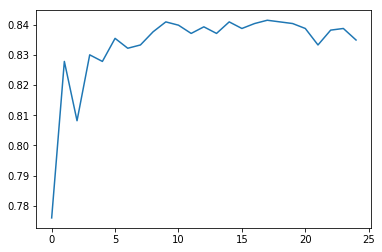

In [10]:
plt.cla()
plt.plot(trees, accuracy)
plt.show()